### Copyright 2022 Jens Liebehenschel, Frankfurt University of Applied Sciences, FB2, Computer Science
### No liability or warranty; only for educational and non-commercial purposes
### See some basic hints for working with Jupyter notebooks in README.md
## Generate some statistics for hashing with collision resolution using open addressing

## Constants

In [1]:
# The size of array in tests can be changed here
FIRST=10
LAST=53
ARRAY_SIZES = list(range(FIRST, LAST+1))

In [2]:
# linear and quadratic probing, i has to be counted up, starting at 0 for the first call
def h_mod_lin(key, i, array_size):
    return (key + i) % array_size
def h_mod_quad(key, i, array_size):
    return (key + i**2) % array_size

## Calculate statistics for reached positions during probing

In [3]:
# Insert a number of keys with identical hash value (worst case) and see how many different positions are reached
# The number of keys and probes for each key is given as a parameter
def calc_reached_positions(hash_table, key, num_keys, hash_func, num_probes):
    for _ in range(num_keys):
        for i in range(num_probes):
            if hash_table[hash_func(key, i, len(hash_table))] == None:
                hash_table[hash_func(key, i, len(hash_table))] = key
                break
    return hash_table

In [4]:
# calculate statistics, i.e. insert the same key a given number of times for observing collisions during probing
res_lin = []
res_quad = []
key = 0
for array_size in ARRAY_SIZES:
    num_keys = array_size//2
    num_probes = array_size
    hash_table = list([None]*array_size)
    res_lin.append([num_keys, num_probes, calc_reached_positions(hash_table, key, num_keys, h_mod_lin, num_probes)])
    hash_table = list([None]*array_size)
    res_quad.append([num_keys, num_probes, calc_reached_positions(hash_table, key, num_keys, h_mod_quad, num_probes)])


## Output statistics for reached positions during probing

In [5]:
# textual output of statistics
def output_reached_positions(type, l):
    print("*** " + type + " ***")
    for result in l:
        #print(result)
        print("Hash table size", len(result[2]), "with", result[0], "keys and", result[1], "probes for each insertion:")
        num_reached_positions = len(result[2]) - result[2].count(None)
        print("->", num_reached_positions, "positions were reached,", result[0] - num_reached_positions, "keys could not be inserted.")
# output calculated statistics now
#output_reached_positions("Linear Probing", res_lin)
#print()
#output_reached_positions("Quadratic Probing", res_quad)

In [6]:
# graphical output of statistics
import pandas as pd
import matplotlib.pyplot as plt

def plot_stats_collision(no_collision, collision):
    data={"No Collision": no_collision, "Collision": collision}
    df=pd.DataFrame(data, index=ARRAY_SIZES)
    df.plot(kind="bar", stacked=True, color=["green", "red"], figsize=(16,8))
    plt.show()

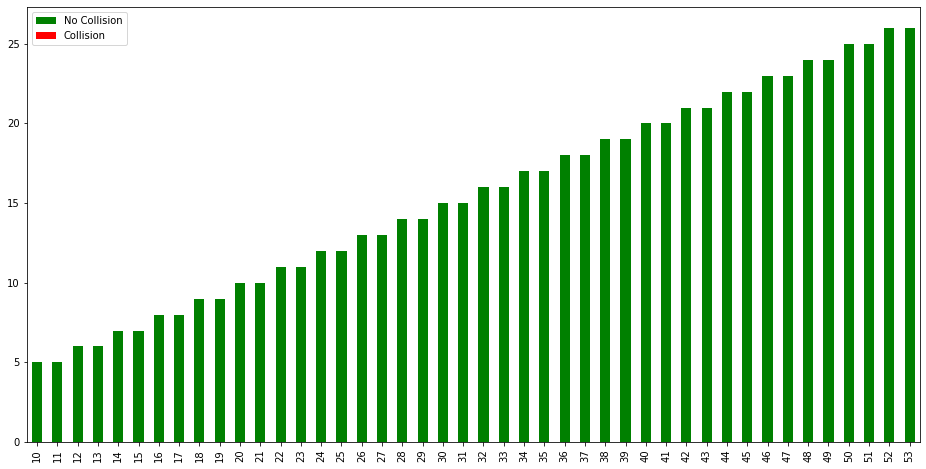

In [7]:
# calculation and output statistics for linear probing
no_collision_lin = [len(res_lin[i][2]) - res_lin[i][2].count(None) for i in range(len(res_lin))]
collision_lin = [res_lin[i][0] - no_collision_lin[i] for i in range(len(res_lin))]
plot_stats_collision(no_collision_lin, collision_lin)

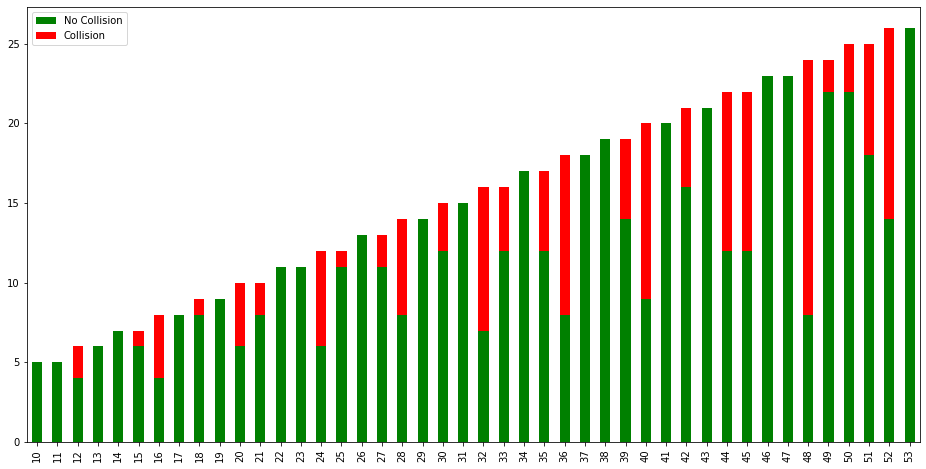

In [8]:
# calculation and output statistics for quadratic probing
no_collision_quad = [len(res_quad[i][2]) - res_quad[i][2].count(None) for i in range(len(res_quad))]
collision_quad = [res_quad[i][0] - no_collision_quad[i] for i in range(len(res_quad))]
plot_stats_collision(no_collision_quad, collision_quad)

## Calculate statistics for distribution of the keys in the hash table

In [9]:
# calculation of clusters in the above scenarios
# function returns [number of clusters of keys, average size of a cluster]
# note: if there is no key in the hash table, then the function crashes
def calc_clusters(hash_table):
    num_keys_in_clusters = 0
    num_clusters = 0 # count the ends of the clusters
    for i in range(len(hash_table)):
        if hash_table[i] != None:
            num_keys_in_clusters += 1
            if hash_table[(i+1) % len(hash_table)] == None:
                num_clusters += 1
    return [num_clusters, num_keys_in_clusters/num_clusters]

In [10]:
# calculation and output statistics for linear and quadratic probing
clusters_lin = [calc_clusters(res_lin[i][2]) for i in range(len(res_lin))]
clusters_quad = [calc_clusters(res_quad[i][2]) for i in range(len(res_quad))]

## Output statistics for distribution of the keys in the hash table

In [11]:
# some basic textual output
#print([res_lin[i][2] for i in range(len(res_lin))])
#print(clusters_lin)
#print()
#print([res_quad[i][2] for i in range(len(res_lin))])
#print(clusters_quad)

In [12]:
# show parameters of distribution of keys in hash table for different probing algorithms
def plot_stats_comparison(text, data1, text_data1, data2, text_data2):
    data={text_data1: data1, text_data2: data2}
    df=pd.DataFrame(data, index=ARRAY_SIZES)
    df.plot(kind="bar", color=["orange", "blue"], figsize=(16,8))
    plt.show()

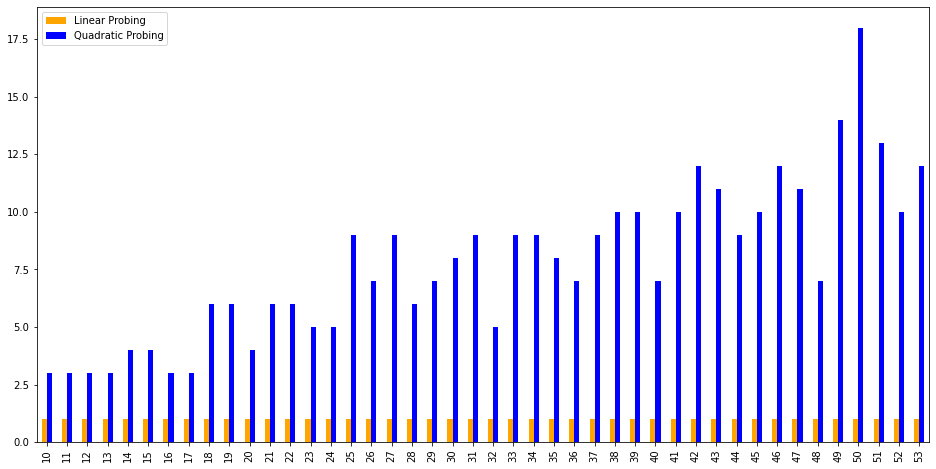

In [13]:
# comparison of the number of clusters
plot_stats_comparison("Numbers of Clusters", \
                       [clusters_lin[i][0] for i in range(len(res_lin))], "Linear Probing", \
                       [clusters_quad[i][0] for i in range(len(res_quad))], "Quadratic Probing")

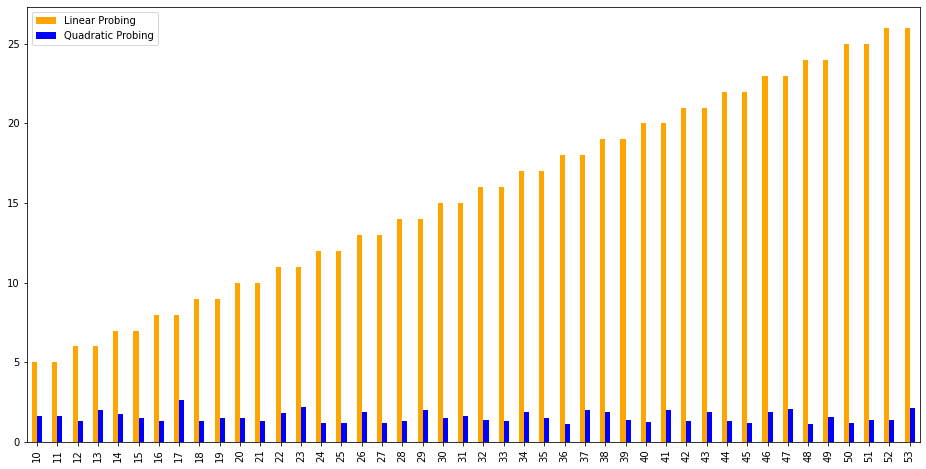

In [14]:
# comparison of the size of clusters
plot_stats_comparison("Average Sizes of Clusters", \
                       [clusters_lin[i][1] for i in range(len(res_lin))], "Linear Probing", \
                       [clusters_quad[i][1] for i in range(len(res_quad))], "Quadratic Probing")

### Validation of data

In [15]:
success_lin = []
success_quad = []
for i in range(len(ARRAY_SIZES)):
    # attention: relying on checking float values for equality is very dangerous, but works here
    # checks for linear probing
    success_lin.append(res_lin[i][0] == no_collision_lin[i]+collision_lin[i] and 
                       clusters_lin[i][0]*clusters_lin[i][1] == no_collision_lin[i])
    # checks for quadratic probing
    success_quad.append(res_quad[i][0] == no_collision_quad[i]+collision_quad[i] and 
                       clusters_quad[i][0]*clusters_quad[i][1] == no_collision_quad[i])

# check results
if all(success_lin):
    print("Data validation for linear probing ok.")
else:
    print("Error in data validation for linear probing.")
    print(success_lin)
if all(success_quad):
    print("Data validation for quadratic probing ok.")
else:
    print("Error in data validation for quadratic probing.")
    print(success_quad)

Data validation for linear probing ok.
Data validation for quadratic probing ok.


### Your tests here ...

In [16]:
FIRST=4
LAST=13
ARRAY_SIZES = list(range(FIRST, LAST+1))

In [17]:
# calculate statistics, i.e. insert the same key a given number of times for observing collisions during probing
res_lin = []
res_quad = []
key = 3
for array_size in ARRAY_SIZES:
    num_keys = array_size//2
    num_probes = array_size
    hash_table = list([None]*array_size)
    res_lin.append([num_keys, num_probes, calc_reached_positions(hash_table, key, num_keys, h_mod_lin, num_probes)])
    hash_table = list([None]*array_size)
    res_quad.append([num_keys, num_probes, calc_reached_positions(hash_table, key, num_keys, h_mod_quad, num_probes)])


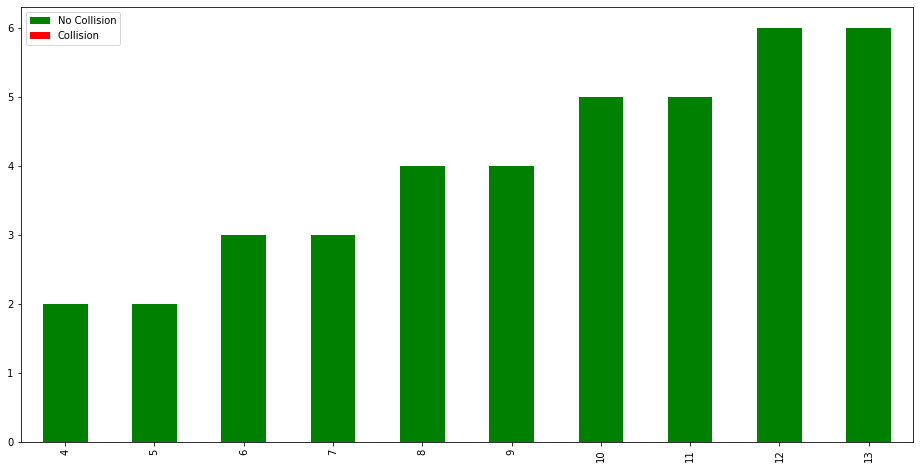

In [18]:
# calculation and output statistics for linear probing
no_collision_lin = [len(res_lin[i][2]) - res_lin[i][2].count(None) for i in range(len(res_lin))]
collision_lin = [res_lin[i][0] - no_collision_lin[i] for i in range(len(res_lin))]
plot_stats_collision(no_collision_lin, collision_lin)

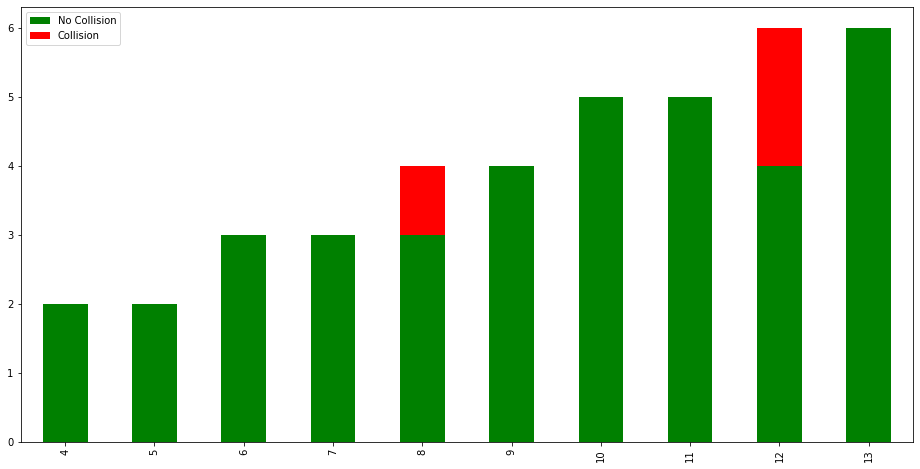

In [19]:
# calculation and output statistics for quadratic probing
no_collision_quad = [len(res_quad[i][2]) - res_quad[i][2].count(None) for i in range(len(res_quad))]
collision_quad = [res_quad[i][0] - no_collision_quad[i] for i in range(len(res_quad))]
plot_stats_collision(no_collision_quad, collision_quad)

In [20]:
# calculation and output statistics for linear and quadratic probing
clusters_lin = [calc_clusters(res_lin[i][2]) for i in range(len(res_lin))]
clusters_quad = [calc_clusters(res_quad[i][2]) for i in range(len(res_quad))]

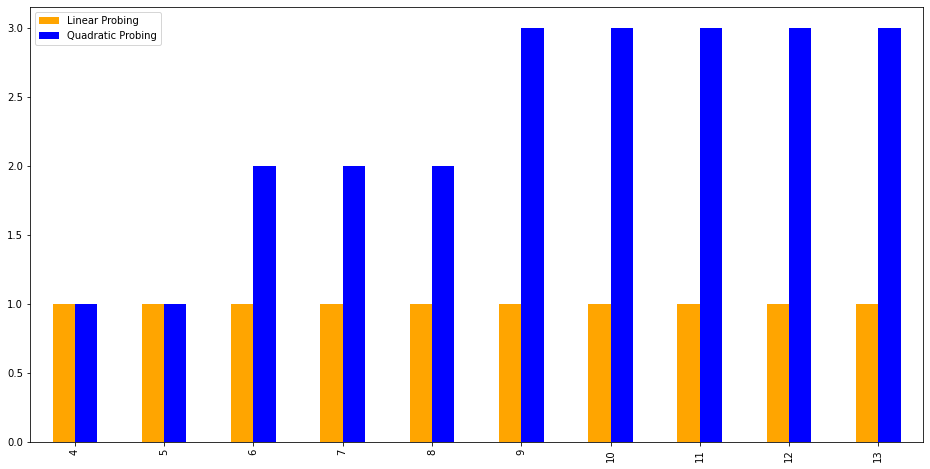

In [21]:
# comparison of the number of clusters
plot_stats_comparison("Numbers of Clusters", \
                       [clusters_lin[i][0] for i in range(len(res_lin))], "Linear Probing", \
                       [clusters_quad[i][0] for i in range(len(res_quad))], "Quadratic Probing")

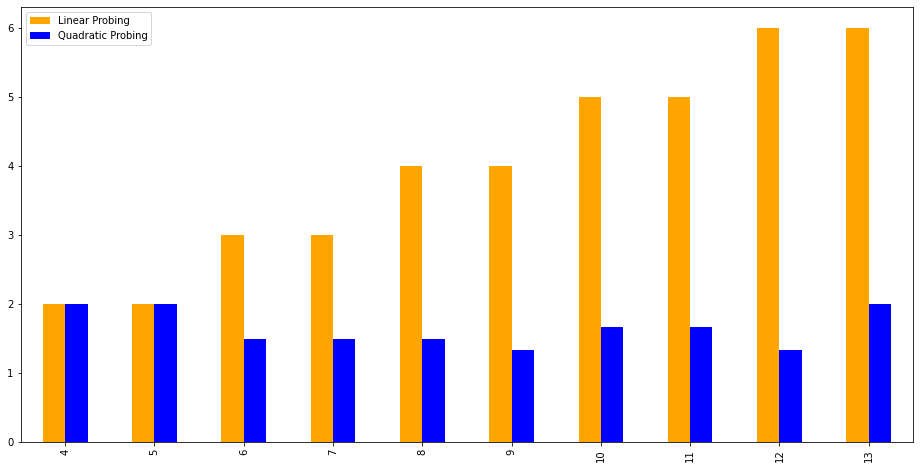

In [22]:
# comparison of the size of clusters
plot_stats_comparison("Average Sizes of Clusters", \
                       [clusters_lin[i][1] for i in range(len(res_lin))], "Linear Probing", \
                       [clusters_quad[i][1] for i in range(len(res_quad))], "Quadratic Probing")

In [23]:
# ... and here ...